# 13_1.Regression(설명)
- https://www.statsmodels.org/stable/gettingstarted.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
mr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/13_1.MR(expl).csv', encoding="cp949")
mr_df.head()

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도
0,1,1,2,3,18,2,7,6,12,12,8,6
1,2,2,2,2,22,2,8,3,11,6,4,4
2,3,2,2,2,26,2,8,7,14,18,12,9
3,4,1,2,4,34,2,8,7,18,15,4,7
4,5,1,2,4,28,2,9,8,16,23,14,11


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
mr_df['성별'].replace({1:'남자', 2:'여자'}, inplace=True)
mr_df['결혼'].replace({1:'결혼', 2:'미혼'}, inplace=True)
mr_df['학력'].replace({1:'초중고생', 2:'고졸', 3:'대학생', 4:'대졸'}, inplace=True)

mr_df['성별'] = mr_df['성별'].astype('category')
mr_df['결혼'] = mr_df['결혼'].astype('category')
mr_df['학력'] = mr_df['학력'].astype('category')
mr_df

,no,성별,결혼,학력,연령,도구,보상,정보,디자인,공동체,몰입,충성도
0,1,남자,미혼,대학생,18,2,7,6,12,12,8,6
1,2,여자,미혼,고졸,22,2,8,3,11,6,4,4
2,3,여자,미혼,고졸,26,2,8,7,14,18,12,9
3,4,남자,미혼,대졸,34,2,8,7,18,15,4,7
4,5,남자,미혼,대졸,28,2,9,8,16,23,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...
371,372,남자,결혼,대학생,35,10,10,9,26,20,13,12
372,373,여자,미혼,대학생,24,10,10,13,28,29,19,15
373,374,여자,미혼,고졸,23,10,12,5,22,18,12,9
374,375,여자,미혼,대졸,19,10,15,7,14,16,15,10


### 2.3 자료구조 살펴보기

In [5]:
mr_df.shape

(376, 12)

In [6]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   no      376 non-null    int64   
 1   성별      376 non-null    category
 2   결혼      376 non-null    category
 3   학력      376 non-null    category
 4   연령      376 non-null    int64   
 5   도구      376 non-null    int64   
 6   보상      376 non-null    int64   
 7   정보      376 non-null    int64   
 8   디자인     376 non-null    int64   
 9   공동체     376 non-null    int64   
 10  몰입      376 non-null    int64   
 11  충성도     376 non-null    int64   
dtypes: category(3), int64(9)
memory usage: 28.1 KB


In [7]:
mr_df.columns

Index(['no', '성별', '결혼', '학력', '연령', '도구', '보상', '정보', '디자인', '공동체', '몰입',
       '충성도'],
      dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
mr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
no,376.0,188.500,108.686,1.0,94.75,188.5,282.25,376.0
연령,376.0,26.646,6.938,11.0,22.00,26.0,30.00,50.0
도구,376.0,6.231,1.534,2.0,5.00,6.0,8.00,10.0
보상,376.0,10.492,2.591,4.0,9.00,11.0,12.00,18.0
정보,376.0,8.915,1.874,3.0,8.00,9.0,10.00,15.0
디자인,376.0,18.936,3.274,8.0,17.00,19.0,21.00,28.0
공동체,376.0,19.375,3.218,6.0,18.00,19.0,21.00,29.0
몰입,376.0,12.689,2.227,4.0,12.00,13.0,14.00,20.0
충성도,376.0,10.223,1.781,3.0,9.00,10.0,11.00,15.0


In [9]:
# 범주형 변수
# lecture_df.columns
categorical_features = ['성별', '결혼', '학력']

for col in categorical_features:
    print("----", col, "----")
    results = mr_df[col].value_counts()
    print(results, "\n")

---- 성별 ----
여자    209
남자    167
Name: 성별, dtype: int64 

---- 결혼 ----
미혼    275
결혼    101
Name: 결혼, dtype: int64 

---- 학력 ----
대졸      124
대학생     124
고졸       72
초중고생     56
Name: 학력, dtype: int64 



## 4.Regression(설명)
- https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
- 수치형 + 범주형
- dmatrix 사용


### 4.1 Regression

In [10]:
# 코드 이용
columns = ['도구', '보상', '정보', '디자인', '공동체', '몰입', '연령',
           'C(성별)', 'C(결혼)', 'C(학력)']

formula = "충성도 ~ " + " + ".join(columns)
formula

'충성도 ~ 도구 + 보상 + 정보 + 디자인 + 공동체 + 몰입 + 연령 + C(성별) + C(결혼) + C(학력)'

In [11]:
# dmatrix 이용
from patsy import dmatrices

y, X = dmatrices(formula,
                 data = mr_df,
                 return_type = 'dataframe')

In [12]:
X.head()

,Intercept,C(성별)[T.여자],C(결혼)[T.미혼],C(학력)[T.대졸],C(학력)[T.대학생],C(학력)[T.초중고생],도구,보상,정보,디자인,공동체,몰입,연령
0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,7.0,6.0,12.0,12.0,8.0,18.0
1,1.0,1.0,1.0,0.0,0.0,0.0,2.0,8.0,3.0,11.0,6.0,4.0,22.0
2,1.0,1.0,1.0,0.0,0.0,0.0,2.0,8.0,7.0,14.0,18.0,12.0,26.0
3,1.0,0.0,1.0,1.0,0.0,0.0,2.0,8.0,7.0,18.0,15.0,4.0,34.0
4,1.0,0.0,1.0,1.0,0.0,0.0,2.0,9.0,8.0,16.0,23.0,14.0,28.0


In [13]:
model = sm.OLS(y, X)   # 모델 생성
result = model.fit()   # 모델 실행

In [14]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    충성도   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          1.21e-109
Time:                        12:38:18   Log-Likelihood:                -469.48
No. Observations:                 376   AIC:                             965.0
Df Residuals:                     363   BIC:                             1016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0909      0.466     -2.342

### 4.2 표준화 계수

In [15]:
# 수치형 자료만 있을때
# model_std = sm.OLS(zscore(y), zscore(X))   # 모델 생성
# result_std = model_std.fit()   # 모델 실행
# print(result_std.summary())

In [16]:
X.columns

Index(['Intercept', 'C(성별)[T.여자]', 'C(결혼)[T.미혼]', 'C(학력)[T.대졸]',
       'C(학력)[T.대학생]', 'C(학력)[T.초중고생]', '도구', '보상', '정보', '디자인', '공동체', '몰입',
       '연령'],
      dtype='object')

In [17]:
X_cat = X[['C(성별)[T.여자]', 'C(결혼)[T.미혼]', 'C(학력)[T.대졸]','C(학력)[T.대학생]', 'C(학력)[T.초중고생]']]
X_cat

,C(성별)[T.여자],C(결혼)[T.미혼],C(학력)[T.대졸],C(학력)[T.대학생],C(학력)[T.초중고생]
0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
371,0.0,0.0,0.0,1.0,0.0
372,1.0,1.0,0.0,1.0,0.0
373,1.0,1.0,0.0,0.0,0.0
374,1.0,1.0,1.0,0.0,0.0


In [18]:
from scipy.stats.mstats import zscore

X_std = X[['연령', '도구', '보상', '정보', '디자인', '공동체', '몰입']]
X_std = zscore(X_std)
X_std

,연령,도구,보상,정보,디자인,공동체,몰입
0,-1.247846,-2.761391,-1.349413,-1.557321,-2.121169,-2.294612,-2.107816
1,-0.670559,-2.761391,-0.962986,-3.160111,-2.426982,-4.161416,-3.905975
2,-0.093272,-2.761391,-0.962986,-1.023058,-1.509544,-0.427809,-0.309656
3,1.061302,-2.761391,-0.962986,-1.023058,-0.286293,-1.361211,-3.905975
4,0.195372,-2.761391,-0.576558,-0.488794,-0.897918,1.127860,0.589423
...,...,...,...,...,...,...,...
371,1.205624,2.459391,-0.190131,0.045469,2.160209,0.194459,0.139883
372,-0.381915,2.459391,-0.190131,2.182523,2.771835,2.994664,2.837123
373,-0.526237,2.459391,0.582725,-2.091584,0.936958,-0.427809,-0.309656
374,-1.103524,2.459391,1.742007,-1.023058,-1.509544,-1.050077,1.038963


In [19]:
X_std = pd.concat([X_cat, X_std], axis=1)
X_std

,C(성별)[T.여자],C(결혼)[T.미혼],C(학력)[T.대졸],C(학력)[T.대학생],C(학력)[T.초중고생],연령,도구,보상,정보,디자인,공동체,몰입
0,0.0,1.0,0.0,1.0,0.0,-1.247846,-2.761391,-1.349413,-1.557321,-2.121169,-2.294612,-2.107816
1,1.0,1.0,0.0,0.0,0.0,-0.670559,-2.761391,-0.962986,-3.160111,-2.426982,-4.161416,-3.905975
2,1.0,1.0,0.0,0.0,0.0,-0.093272,-2.761391,-0.962986,-1.023058,-1.509544,-0.427809,-0.309656
3,0.0,1.0,1.0,0.0,0.0,1.061302,-2.761391,-0.962986,-1.023058,-0.286293,-1.361211,-3.905975
4,0.0,1.0,1.0,0.0,0.0,0.195372,-2.761391,-0.576558,-0.488794,-0.897918,1.127860,0.589423
...,...,...,...,...,...,...,...,...,...,...,...,...
371,0.0,0.0,0.0,1.0,0.0,1.205624,2.459391,-0.190131,0.045469,2.160209,0.194459,0.139883
372,1.0,1.0,0.0,1.0,0.0,-0.381915,2.459391,-0.190131,2.182523,2.771835,2.994664,2.837123
373,1.0,1.0,0.0,0.0,0.0,-0.526237,2.459391,0.582725,-2.091584,0.936958,-0.427809,-0.309656
374,1.0,1.0,1.0,0.0,0.0,-1.103524,2.459391,1.742007,-1.023058,-1.509544,-1.050077,1.038963


In [20]:
y_std = mr_df[["충성도"]]
y_std = zscore(y_std)
y_std

,충성도
0,-2.374777
1,-3.499357
2,-0.687908
3,-1.812488
4,0.436672
...,...
371,0.998962
372,2.685831
373,-0.687908
374,-0.125618


In [21]:
model_std = sm.OLS(y_std, X_std)   # 모델 생성
result_std = model_std.fit()   # 모델 실행
print(result_std.summary())

                                 OLS Regression Results                                
Dep. Variable:                    충성도   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.766
Method:                 Least Squares   F-statistic:                              103.7
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                   1.76e-109
Time:                        12:38:18   Log-Likelihood:                         -254.15
No. Observations:                 376   AIC:                                      532.3
Df Residuals:                     364   BIC:                                      579.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [22]:
print("===== 비표준화 계수 =====")
print(result.params)
print("\n")
print("===== 표준화 계수 =====")
print(result_std.params)


===== 비표준화 계수 =====
Intercept       -1.090870
C(성별)[T.여자]      0.146277
C(결혼)[T.미혼]     -0.057101
C(학력)[T.대졸]      0.329953
C(학력)[T.대학생]     0.131721
C(학력)[T.초중고생]    0.220665
도구               0.023737
보상               0.072752
정보               0.111140
디자인              0.157301
공동체              0.134706
몰입               0.317508
연령              -0.016131
dtype: float64


===== 표준화 계수 =====
C(성별)[T.여자]      0.053465
C(결혼)[T.미혼]     -0.105115
C(학력)[T.대졸]      0.129922
C(학력)[T.대학생]     0.015272
C(학력)[T.초중고생]    0.068452
연령              -0.084729
도구               0.019932
보상               0.110160
정보               0.116202
디자인              0.286784
공동체              0.242061
몰입               0.401034
dtype: float64


## 5.가정검정
- https://ethanweed.github.io/pythonbook/05.04-regression.html#regressionnormality
- 잔차의 등분산성: Breusch-Pagan
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

### 5.1 기본 검정
- 잔차의 정규성: Jarque-Bera, Omnibus(D'Angostino's test)
- 독립성(자기상관): Durbin-Watson
- 다중공선성(VIF): Cond. No

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    충성도   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          1.21e-109
Time:                        12:38:18   Log-Likelihood:                -469.48
No. Observations:                 376   AIC:                             965.0
Df Residuals:                     363   BIC:                             1016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0909      0.466     -2.342

### 5.2 잔차의 등분산 검정
- 잔차의 등분산성 테스트: Breush-Pagan 테스트:


In [24]:
# 잔차의 등분산성 테스트: Breush-Pagan 테스트:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(result.resid, result.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 13.692360414295386),
 ('p-value', 0.32078345537272),
 ('f-value', 1.1432105130492498),
 ('f p-value', 0.32361681851581087)]

In [25]:
# 잔차 플롯

# 표준화 잔차 생성
influence = result.get_influence()
res_standard = influence.resid_studentized_internal

# 예측값 생성
pred = result.predict(X)

# 데이터 프레임으로 생성
regplot_df = pd.DataFrame({'pred': pred, 'res_standard': res_standard})
regplot_df

,pred,res_standard
0,5.961116,0.046449
1,3.414913,0.709523
2,8.423383,0.686386
3,6.163037,1.016076
4,10.381837,0.738612
...,...,...
371,11.352964,0.772360
372,15.496142,-0.596555
373,9.988813,-1.190500
374,10.248529,-0.301320


<Axes: >

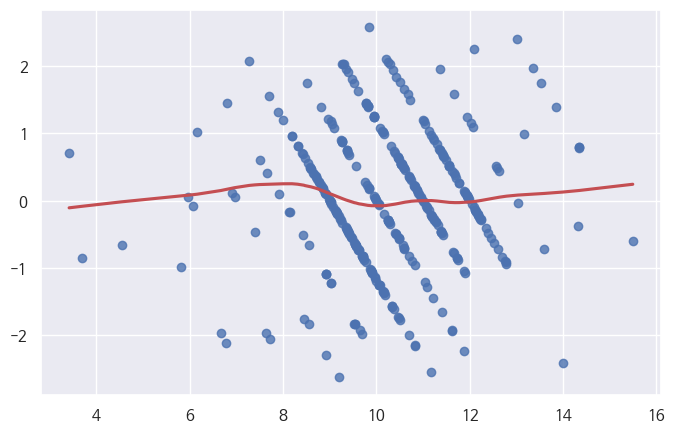

In [26]:
## 잔차 plot
plt.rc("figure", figsize=(8, 5))
sns.regplot(x = pred,
            y = res_standard,
            lowess = True,
            line_kws=dict(color="r"),
            data = regplot_df)

### 5.3 잔차의 정규성 검정

In [27]:
# shapiro test
pg.normality(result.resid)

,W,pval,normal
0,0.995166,0.292246,True


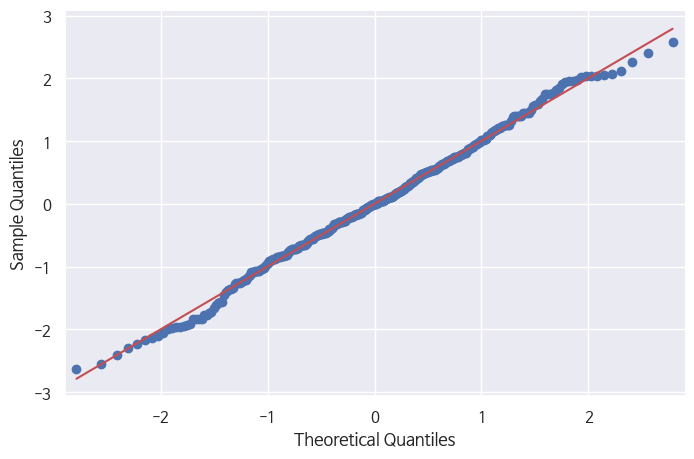

In [28]:
## QQ plot
plt.rc("figure", figsize=(8, 5))
sm.qqplot(res_standard, line = 's')
sns.despine()

### 5.4 이상치 제거

In [29]:
# 표준화 잔차를 이용한 이상치 확인
stud_res = result.outlier_test()
stud_res.sort_values(by = "student_resid", ascending = False).head(5)

,student_resid,unadj_p,bonf(p)
25,2.595779,0.009822,1.0
126,2.412650,0.016333,1.0
154,2.271076,0.023729,1.0
205,2.120766,0.034621,1.0
53,2.084467,0.037818,1.0


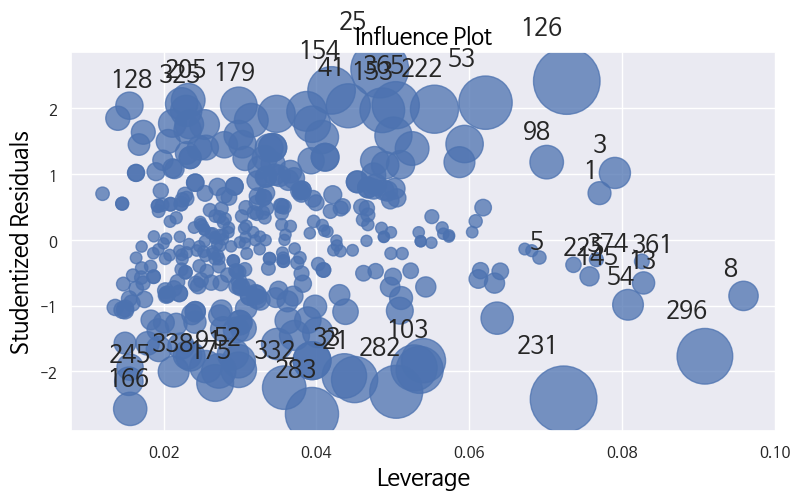

In [30]:
## cooks_distance를 이용한 이상치 확인
## https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

fig = sm.graphics.influence_plot(result, criterion="cooks")
plt.rc("figure", figsize=(8, 5))
plt.rc("font", size = 7)
fig.tight_layout(pad = 1.0)

In [31]:
# cooks_distance를 이용한 이상치 확인
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(result).cooks_distance
pd.DataFrame(test_class).T.sort_values(by = 0, ascending = False).head(10)

,0,1
231,0.034821,1.0
126,0.034684,1.0
25,0.025885,1.0
296,0.023968,1.0
53,0.021942,1.0
283,0.021776,1.0
282,0.021569,1.0
222,0.017651,1.0
154,0.017189,1.0
365,0.016932,1.0


In [32]:
# 이상치 제거
# mr_df = mr_df.drop(120)

### 5.5 선형성

<Axes: xlabel='pred', ylabel='충성도'>

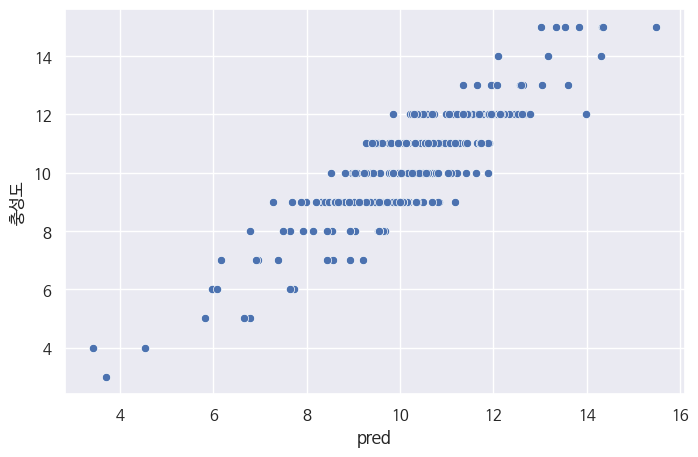

In [33]:
# 회귀도표: 예측치 vs 실제값
sns.scatterplot(x = regplot_df["pred"], y = mr_df["충성도"])

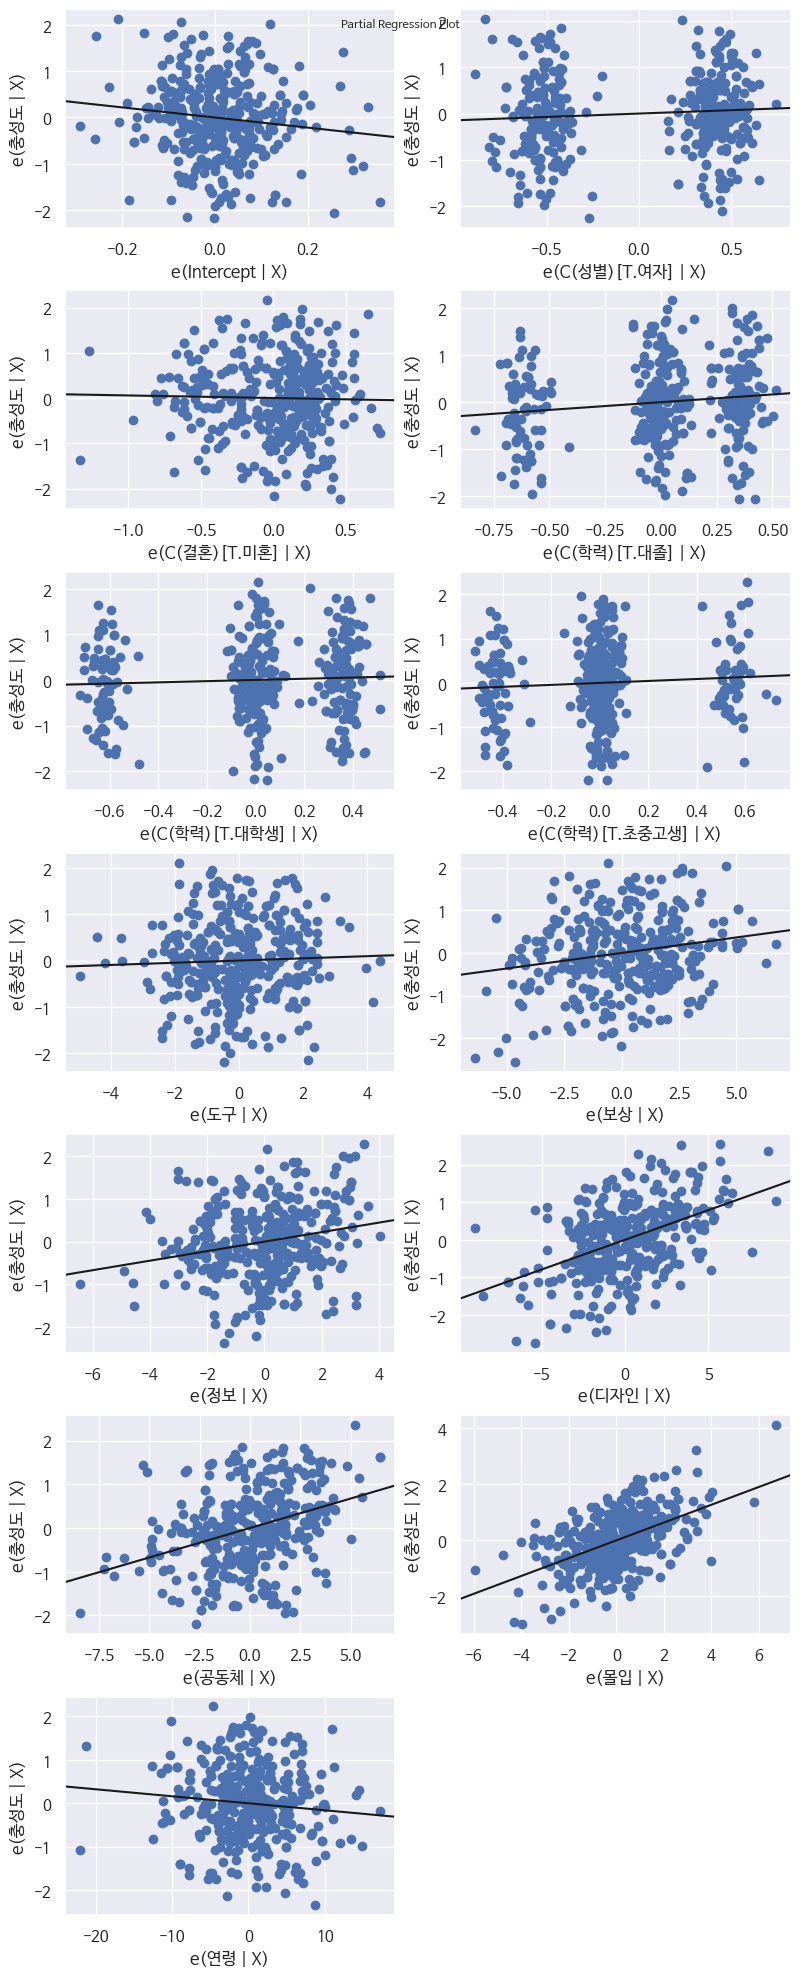

In [34]:
# 부분 회귀 도표
plt.rc("figure", figsize=(8, 20))
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad = 1.0)

### 5.6 다중 공선성
- VIF 10이상 삭제

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.values.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

    VIF Factor       features
0        110.7      Intercept
1          1.1    C(성별)[T.여자]
2          1.7    C(결혼)[T.미혼]
3          1.9    C(학력)[T.대졸]
4          1.9   C(학력)[T.대학생]
5          1.6  C(학력)[T.초중고생]
6          1.2             도구
7          1.2             보상
8          1.3             정보
9          1.4            디자인
10         1.8            공동체
11         1.9             몰입
12         1.7             연령
